In [18]:
import os
import numpy as np
from skimage.io import imread, imsave
from PIL import Image

In [103]:
img_paths = 'E:\DataSets\BraTS2020\Brats2018FoulModel2D\\testImage_small'
img_path = "BraTS19_CBICA_ANV_1_72.npy"
img_path2 = "BraTS19_CBICA_BGE_1_92.npy"
img_path3 = "BraTS19_CBICA_BHZ_1_69.npy"
img_path = os.path.join(img_paths,img_path3)
img_path

'E:\\DataSets\\BraTS2020\\Brats2018FoulModel2D\\testImage_small\\BraTS19_CBICA_BHZ_1_69.npy'

In [104]:
img = np.load(img_path)

In [61]:
i=0
img_n = img[:,:,i]
img_n[img_n<0]=0
im = Image.fromarray(img_n*256/img_n.max())
im = im.convert('L')
# im.save(".\pics\image_ANV_1_72_{}.png".format(i))

In [62]:
imr = Image.open("./pics/origin/zipper_artifact.jpg")
imr = np.array(imr)

In [64]:
(imr/256*img_n.max()-img_n).max()

1.7871168734985092

In [65]:
img[:,:,0]=imr/256*img_n.max()
np.save("E:\DataSets\BraTS2020\Brats2018FoulModel2D\\testImage_small_artifact\BHZ",img)


In [83]:
img_copy = img.copy()
img_copy[img_copy==-9]=0
imax = img_copy.max()
imin = img_copy.min()
print("max:{}, min:{}".format(img_copy.max(),img_copy.min()))
for i in [0,1,2,3]:
    img_slice = Image.open("./pics/artifact/{}.png".format(i))
    img_slice = np.array(img_slice)/256*(imax-imin)+imin
    img[:,:,i][img[:,:,i]!=-9]=img_slice[img[:,:,i]!=-9]

np.save("E:\DataSets\BraTS2020\Brats2018FoulModel2D\\testImage_small_artifact\BHZ_zipper",img)

max:2.3274279045543063, min:-3.288199895747175


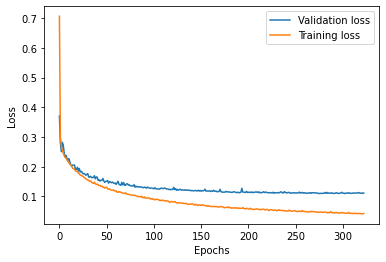

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

log = pd.read_csv("./models/Jiu0Monkey_Unet_woDS/log.csv")
plt.plot(log['val_loss'],label='Validation loss')
plt.plot(log['loss'],label='Training loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('./pics/losses.png',dpi=600)
plt.show()

In [99]:
img_n = img[:,:,0]+9
im = Image.fromarray(img_n*256/img_n.max())
im = im.convert('L')
im.save(".\pics\origin\{}.png".format('ANV'))

In [102]:
imax = []
for i in [0,1,2,3]:
    img_slice = img[:,:,i]
    img_slice = np.array(img_slice)+9
    imax.append(img_slice.max())
    im = Image.fromarray(img_slice*256/imax[i])
    im = im.convert('L')
    im.save(".\pics_origin\BHZ\{}.png".format(i))

In [113]:
artifact_str = "magnetic_sensitivity"
img_copy = img.copy()
for i in [0,1,2,3]:
    img_slice = Image.open("./pics_origin/BHZ_artifacts/{}/{}.png".format(artifact_str,i))
    img_slice = np.array(img_slice)/256*imax[i]-9
    img[:,:,i]=img_slice

np.save("E:\DataSets\BraTS2020\Brats2018FoulModel2D\\testImage_small_artifact\BHZ_{}".format(artifact_str),img)

In [111]:
ans = np.array(Image.open("./pics_origin/BHZ_artifacts/{}/{}.png".format(artifact_str,i)))